# Section3：過学習

## 過学習とは
- テスト誤差と訓練誤差とで学習曲線が乖離すること \
　⇒特定の訓練サンプルに対して、特化して学習する
 
### 原因
- パラメータの数が多い
- 訓練データが少ない
- パラメータの値が適切でない
- ノードが多いetc..

# 正則化

正則化とは︖ \
ネットワークの自由度(層数、ノード数、パラメータの値etc...)を制約すること \
　⇒正則化手法を利用して過学習を抑制する

#### ゼロから作るディープラーニング　6.4 正則化

機械学習の問題では、過学習（overfitting）が問題になることが多くあります。過学習とは、訓練データに適応しすぎてしまい、訓練データに含まれないほかのデータにはうまく対応できない状態を言います。機械学習で目指すところは汎化性能です。訓練データに含まれないまだ見ぬデータであっても、正しく識別できるモデルが望まれます。

## 正則化手法
- L1正則化、L2正則化
- ドロップアウト

## Weight decay(荷重減衰)

### 過学習の原因
- 重みが大きい値をとることで、過学習が発生することがある。
 - 学習させていくと、重みにばらつきが発生する。
 - 重みが大きい値は、学習において重要な値であり、重みが大きいと過学習が起こる。
 
⇒一部のデータに対して極端な反応を示している状態が、過学習の状態ということになる。

### 過学習の解決策
- 誤差に対して、正則化項を加算することで、重みを抑制する
 - 過学習がおこりそうな重みの大きさ以下で重みをコントロールし、かつ重みの大きさにばらつきを出す必要がある。

##  L1正則化（Lasso、ラッソ回帰）、L2正則化（Ridge、リッジ回帰）

誤差関数に、pノルムを加える \
\begin{aligned}
E_n(w) + \frac{1}{p} \lambda ||{\mathbf{x}} ||_p
\end{aligned}


Pノルム
\begin{aligned}
||{\mathbf{x}} ||_p = (|x_1|^p + |x_2|^p + \cdots + |x_n|^p )^{\frac{1}{p}} 
\end{aligned}

P=1のとき、L1正則化と呼ぶ。（$x + y$）：マンハッタン距離

P=2のとき、L2正則化と呼ぶ。（$\sqrt{x^2 + y^2}$）：ユーグリット距離

#### ゼロから作るディープラーニング　6.4.2 Weight decay

過学習抑制のために昔からよく用いられる手法に、Weight decay（荷重減衰）という手法があります。これは、学習の過程において、大きな重みを持つことに対してペナルティを課すことで、過学習を抑制しようというものです。そもそも、過学習は重みパラメータが大きな値を取ることによって発生することが多くあるのです。

### ドロップアウト

#### 過学習の課題 
- ノードの数が多い 

#### ドロップアウトとは︖ 
- ランダムにノードを削除して学習させること

#### メリット
- データ量を変化させずに、異なるモデルを学習させていると解釈できる


#### ゼロから作るディープラーニング　6.4.3 Dropout

過学習を抑制する手法として、Weight decayという手法を説明しました。しかし、ニューラルネットワークのモデルが複雑になってくると、Weight decayだけでは対応が困難になってきます。そこでDropoutという手法がよく使われます。

# 実装演習　（2_5_overfiting.ipynb）

※誤字：overfittingが正解

# 過学習

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 0.9533333333333334
                : 200. 正答率(テスト) = 0.6754
Generation: 400. 正答率(トレーニング) = 1.0
                : 400. 正答率(テスト) = 0.7168
Generation: 600. 正答率(トレーニング) = 1.0
                : 600. 正答率(テスト) = 0.7243
Generation: 800. 正答率(トレーニング) = 1.0
                : 800. 正答率(テスト) = 0.7267
Generation: 1000. 正答率(トレーニング) = 1.0
                : 1000. 正答率(テスト) = 0.7285


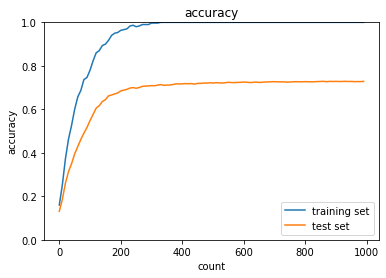

In [3]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from common.multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        # ログ出力は２００回に１回に修正する
        if (i+1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## L2

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 0.7433333333333333
                : 200. 正答率(テスト) = 0.582
Generation: 400. 正答率(トレーニング) = 0.8466666666666667
                : 400. 正答率(テスト) = 0.6832
Generation: 600. 正答率(トレーニング) = 0.86
                : 600. 正答率(テスト) = 0.7168
Generation: 800. 正答率(トレーニング) = 0.8666666666666667
                : 800. 正答率(テスト) = 0.731
Generation: 1000. 正答率(トレーニング) = 0.8666666666666667
                : 1000. 正答率(テスト) = 0.7314


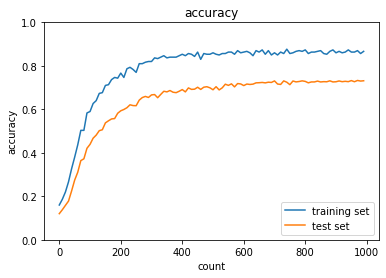

In [4]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        # ログ出力は２００回に１回に修正する
        if (i+1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## L1 正則化

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 0.89
                : 200. 正答率(テスト) = 0.7112
Generation: 400. 正答率(トレーニング) = 0.6766666666666666
                : 400. 正答率(テスト) = 0.5161
Generation: 600. 正答率(トレーニング) = 0.83
                : 600. 正答率(テスト) = 0.6522
Generation: 800. 正答率(トレーニング) = 0.96
                : 800. 正答率(テスト) = 0.7518
Generation: 1000. 正答率(トレーニング) = 0.99
                : 1000. 正答率(テスト) = 0.7502


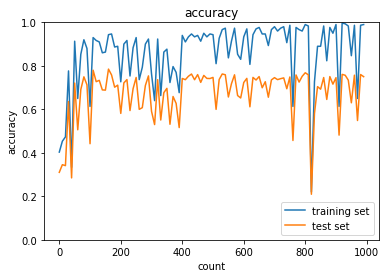

In [6]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.005
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        # ログ出力は２００回に１回に修正する
        if (i+1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### [try] weigth_decay_lambdaの値を変更して正則化の強さを確認しよう

### L2
weight_decay_lambda = 0.1  →　0.5 \
　⇒結果：大きくすると、収束しない

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 0.13
                : 200. 正答率(テスト) = 0.1135
Generation: 400. 正答率(トレーニング) = 0.13
                : 400. 正答率(テスト) = 0.1135
Generation: 600. 正答率(トレーニング) = 0.13
                : 600. 正答率(テスト) = 0.1135
Generation: 800. 正答率(トレーニング) = 0.13
                : 800. 正答率(テスト) = 0.1135
Generation: 1000. 正答率(トレーニング) = 0.13
                : 1000. 正答率(テスト) = 0.1135


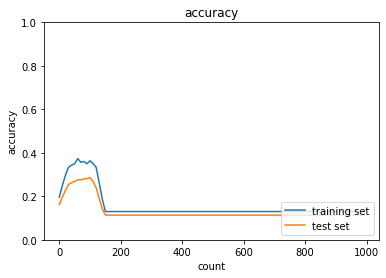

In [8]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.5
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        # ログ出力は２００回に１回に修正する
        if (i+1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### L2
weight_decay_lambda = 0.1  →　0.01 \
　⇒結果：小さくすると、過学習が抑制できない

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 0.8966666666666666
                : 200. 正答率(テスト) = 0.6925
Generation: 400. 正答率(トレーニング) = 0.9866666666666667
                : 400. 正答率(テスト) = 0.7399
Generation: 600. 正答率(トレーニング) = 0.9966666666666667
                : 600. 正答率(テスト) = 0.7508
Generation: 800. 正答率(トレーニング) = 1.0
                : 800. 正答率(テスト) = 0.7537
Generation: 1000. 正答率(トレーニング) = 1.0
                : 1000. 正答率(テスト) = 0.7531


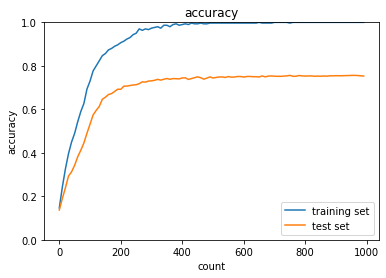

In [16]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.01
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        # ログ出力は２００回に１回に修正する
        if (i+1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### L1
weight_decay_lambda = 0.005 →　0.0001 \
　⇒小さくすると、過学習を抑制できない

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 1.0
                : 200. 正答率(テスト) = 0.7891
Generation: 400. 正答率(トレーニング) = 1.0
                : 400. 正答率(テスト) = 0.7905
Generation: 600. 正答率(トレーニング) = 1.0
                : 600. 正答率(テスト) = 0.7903
Generation: 800. 正答率(トレーニング) = 1.0
                : 800. 正答率(テスト) = 0.7924
Generation: 1000. 正答率(トレーニング) = 1.0
                : 1000. 正答率(テスト) = 0.7933


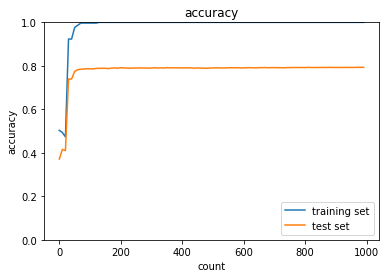

In [17]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.0001
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        # ログ出力は２００回に１回に修正する
        if (i+1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### L1
weight_decay_lambda = 0.005 →　0.01 \
　⇒大きくすると、制度が下がった

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 0.41
                : 200. 正答率(テスト) = 0.3301
Generation: 400. 正答率(トレーニング) = 0.54
                : 400. 正答率(テスト) = 0.4373
Generation: 600. 正答率(トレーニング) = 0.5033333333333333
                : 600. 正答率(テスト) = 0.3717
Generation: 800. 正答率(トレーニング) = 0.75
                : 800. 正答率(テスト) = 0.5794
Generation: 1000. 正答率(トレーニング) = 0.7733333333333333
                : 1000. 正答率(テスト) = 0.5962


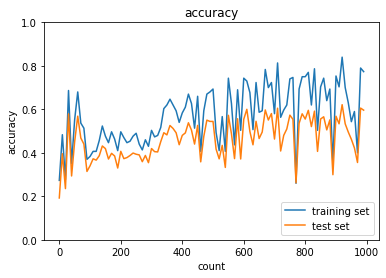

In [18]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.01
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        # ログ出力は２００回に１回に修正する
        if (i+1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Dropout

In [9]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

dropout_ratio = 0.15 \
optimizer = SGD

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 0.13
                : 200. 正答率(テスト) = 0.1135
Generation: 400. 正答率(トレーニング) = 0.13
                : 400. 正答率(テスト) = 0.1135
Generation: 600. 正答率(トレーニング) = 0.13
                : 600. 正答率(テスト) = 0.1135
Generation: 800. 正答率(トレーニング) = 0.13
                : 800. 正答率(テスト) = 0.1135
Generation: 1000. 正答率(トレーニング) = 0.13
                : 1000. 正答率(テスト) = 0.1135


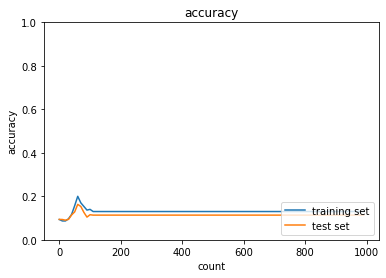

In [11]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        # ログ出力は２００回に１回に修正する
        if (i+1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### [try] dropout_ratioの値を変更してみよう

dropout_ratio = 0.15　→　0.3 \
　⇒結果：収束しないことは変わらない

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 0.13
                : 200. 正答率(テスト) = 0.1135
Generation: 400. 正答率(トレーニング) = 0.13
                : 400. 正答率(テスト) = 0.1135
Generation: 600. 正答率(トレーニング) = 0.13
                : 600. 正答率(テスト) = 0.1135
Generation: 800. 正答率(トレーニング) = 0.13
                : 800. 正答率(テスト) = 0.1135
Generation: 1000. 正答率(トレーニング) = 0.13
                : 1000. 正答率(テスト) = 0.1135


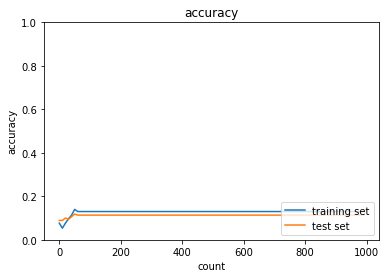

In [12]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.3
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        # ログ出力は２００回に１回に修正する
        if (i+1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### [try] optimizerとdropout_ratioの値を変更してみよう

dropout_ratio = 0.15　→　0.2 \
optimizer = SGD　→　Adam

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 1.0
                : 200. 正答率(テスト) = 0.7685
Generation: 400. 正答率(トレーニング) = 1.0
                : 400. 正答率(テスト) = 0.7688
Generation: 600. 正答率(トレーニング) = 1.0
                : 600. 正答率(テスト) = 0.7675
Generation: 800. 正答率(トレーニング) = 1.0
                : 800. 正答率(テスト) = 0.7552
Generation: 1000. 正答率(トレーニング) = 1.0
                : 1000. 正答率(テスト) = 0.773


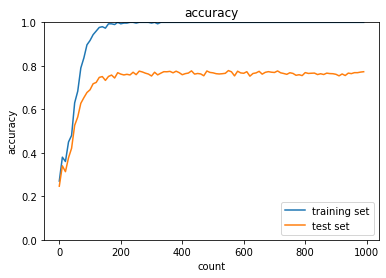

In [20]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
#optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        # ログ出力は２００回に１回に修正する
        if (i+1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Dropout + L1

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 0.45
                : 200. 正答率(テスト) = 0.4017
Generation: 400. 正答率(トレーニング) = 0.72
                : 400. 正答率(テスト) = 0.6124
Generation: 600. 正答率(トレーニング) = 0.8433333333333334
                : 600. 正答率(テスト) = 0.6976
Generation: 800. 正答率(トレーニング) = 0.89
                : 800. 正答率(テスト) = 0.7238
Generation: 1000. 正答率(トレーニング) = 0.9333333333333333
                : 1000. 正答率(テスト) = 0.741


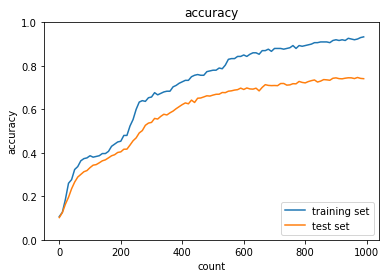

In [14]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.08
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        # ログ出力は２００回に１回に修正する
        if (i+1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# 確認テスト

#### P53

問） \
機械学習で使われる線形モデル(線形回帰、主成分分析…etc)の正則化は、モデルの重みを制限することで可能となる。 \
前述の線形モデルの正則化手法の中にリッジ回帰という手法があり、その特徴として正しいものを選択しなさい。

(a) ハイパーパラメータを大きな値に設定すると、全ての重みが限りなく０に近づく。 \
(b) ハイパーパラメータを０に設定すると、非線形回帰となる。 \
(c) バイアス項についても、正則化される。 \
(d) リッジ回帰の場合、隠れ層に対して正則化項を加える。

答） \
(a)

#### P64

問）下図について、L1正則化を表しているグラフはどちらか答えよ。

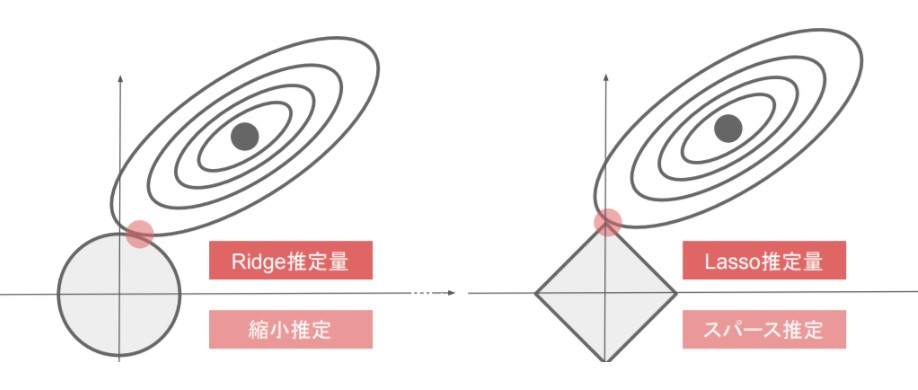

In [1]:
from IPython.display import Image
Image("./Section3_確認テスト2.jpg")

答）右側